# Part I
# data612 - Group Project 4 : Recommender System (Accuracy and Beyond)
# date: 2019-07-02
# by: Sang Yoon (Andy) Hwang, Santosh Cheruku, Anthony Munoz, Neil Hwang

The purpose of this project is to show which algorithm works the best for prediction - SVD, KNNbaseline, NMF and ALS in terms of accuracy measurements. We do have Part I (Python) and Part II (R) - http://rpubs.com/neilhwang/project4.

# Data Preparation

We are going to use 100k ratings dataset from movielens.

In [16]:
import pandas as pd
import numpy as np
import surprise
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from surprise import Dataset
from surprise import KNNBasic
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

From https://grouplens.org/datasets/movielens/, ml-latest-small will be used.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wheremagichappens/an.dy/master/data612/ml-100k/ratings.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Just to make our life a little bit easier, we will change the names of the columns.

In [4]:
df.columns = ['user','item','rating','timestamp']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
user         100836 non-null int64
item         100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# Modelling

In [6]:
reader = Reader(rating_scale=(df.rating.min(), df.rating.max()))
data = Dataset.load_from_df(df[['user', 'item', 'rating']], reader)

Let's split data into 5 folds

In [7]:
data.split(n_folds=5)

# SVD

In [8]:
algo = surprise.SVD()
rmse_svd = surprise.evaluate(algo, data, measures=['RMSE'])

C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning:

The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.

C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning:

Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 



Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8723
------------
Fold 2
RMSE: 0.8742
------------
Fold 3
RMSE: 0.8735
------------
Fold 4
RMSE: 0.8789
------------
Fold 5
RMSE: 0.8684
------------
------------
Mean RMSE: 0.8735
------------
------------


In [9]:
# result = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
# result['test_rmse'] 

# KNNBaseline

In [48]:
algo = surprise.KNNBaseline()
rmse_knn = surprise.evaluate(algo, data, measures=['RMSE'])

C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning:

The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.

C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning:

Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 



Evaluating RMSE of algorithm KNNBaseline.

------------
Fold 1
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8774
------------
Fold 2
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8772
------------
Fold 3
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8752
------------
Fold 4
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8782
------------
Fold 5
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8666
------------
------------
Mean RMSE: 0.8749
------------
------------


# Non-negative Matrix Factorization

In [10]:
algo = surprise.NMF()
rmse_nmf = surprise.evaluate(algo, data, measures=['RMSE'])

Evaluating RMSE of algorithm NMF.

------------
Fold 1


C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning:

The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.

C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning:

Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 



RMSE: 0.9233
------------
Fold 2
RMSE: 0.9221
------------
Fold 3
RMSE: 0.9231
------------
Fold 4
RMSE: 0.9233
------------
Fold 5
RMSE: 0.9140
------------
------------
Mean RMSE: 0.9212
------------
------------


In [11]:
#result = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
#result['test_rmse'] 

# BaselineOnly

In [12]:
algo = surprise.BaselineOnly()
rmse_bo = surprise.evaluate(algo, data, measures=['RMSE'])

Evaluating RMSE of algorithm BaselineOnly.

------------

C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning:

The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.

C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning:

Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 




Fold 1
Estimating biases using als...
RMSE: 0.8726
------------
Fold 2
Estimating biases using als...
RMSE: 0.8741
------------
Fold 3
Estimating biases using als...
RMSE: 0.8711
------------
Fold 4
Estimating biases using als...
RMSE: 0.8773
------------
Fold 5
Estimating biases using als...
RMSE: 0.8666
------------
------------
Mean RMSE: 0.8723
------------
------------


In [13]:
#result = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)
#result['test_rmse'] 

Surprisingly, BaselineOnly is the winner in terms of RMSE.

We know that top 3 models based on RMSE are BaselineOnly, SVD and KNNBaseline. We will only consider these 3 models to create RMSE and classification reports for recall/precision/f1 calculation.

# DataFrame for further calculation

# BaselineOnly - ALS

We will perform train/test (80/20) split to create model. 

In [17]:
trainset, testset = train_test_split(data, test_size=.20)

We will configure ALS parameter for BaselineOnly

In [18]:
bsl_options = {'method': 'als'}
algo = surprise.BaselineOnly(bsl_options=bsl_options)

# Train the algorithm on the trainset, and predict ratings for the testset
predictions_als = algo.fit(trainset).test(testset)

# Then compute RMSE
accuracy.rmse(predictions_als)

Estimating biases using als...
RMSE: 0.8807


0.8806671224483156

# KNNBaseline - pearson_baseline: item-item

In [19]:
# We'll use KNNBaseline with pearson_baseline (item_based)
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute similarities between items
               }
algo = surprise.KNNBaseline(sim_options=sim_options)

# Train the algorithm on the trainset, and predict ratings for the testset
predictions_pear_b_2 = algo.fit(trainset).test(testset)

# Then compute RMSE
accuracy.rmse(predictions_pear_b_2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8603


0.860315148791682

In [20]:
algo = surprise.SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
predictions_svd = algo.fit(trainset).test(testset)

# Then compute RMSE
accuracy.rmse(predictions_svd)

RMSE: 0.8813


0.881258412475736

Let's create DataFrame using prediction result.

In [21]:
prediction_df = pd.DataFrame(predictions_als)
prediction_df.head()

,uid,iid,r_ui,est,details
0,51,5620,3.5,3.627782,{'was_impossible': False}
1,489,2355,2.5,3.015631,{'was_impossible': False}
2,608,1681,0.5,2.769734,{'was_impossible': False}
3,217,1367,3.0,2.516270,{'was_impossible': False}
4,418,4878,5.0,3.812303,{'was_impossible': False}


# Worst 10 - BaselineOnly - ALS

In [49]:
worst_10 = abs(prediction_df['r_ui'] - prediction_df['est']).sort_values(ascending=False).head(10)
top_10 = abs(prediction_df['r_ui'] - prediction_df['est']).sort_values(ascending=True).head(10)
prediction_df.iloc[worst_10.index]

,uid,iid,r_ui,est,details
16382,256,5618,0.5,4.568950,{'was_impossible': False}
4390,495,4993,0.5,4.516344,{'was_impossible': False}
1773,573,44199,0.5,4.423487,{'was_impossible': False}
3779,105,4027,0.5,4.373988,{'was_impossible': False}
19837,256,7099,0.5,4.359910,{'was_impossible': False}
6300,59,2571,1.0,4.818175,{'was_impossible': False}
9088,594,799,0.5,4.204490,{'was_impossible': False}
3507,393,778,0.5,4.187093,{'was_impossible': False}
4474,580,912,0.5,4.174172,{'was_impossible': False}
11029,594,2488,0.5,4.136132,{'was_impossible': False}


# Best 10

In [50]:
prediction_df.iloc[top_10.index]

,uid,iid,r_ui,est,details
8809,452,2028,5.0,5.000000,{'was_impossible': False}
12058,452,356,5.0,5.000000,{'was_impossible': False}
16258,171,318,5.0,5.000000,{'was_impossible': False}
12176,523,318,5.0,5.000000,{'was_impossible': False}
4714,43,356,5.0,5.000000,{'was_impossible': False}
17075,122,260,5.0,5.000000,{'was_impossible': False}
12241,122,2571,5.0,5.000000,{'was_impossible': False}
14705,368,2457,3.0,2.999997,{'was_impossible': False}
12349,425,7153,4.0,4.000055,{'was_impossible': False}
1111,305,55820,4.0,4.000114,{'was_impossible': False}


In [22]:
prediction_df_2 = pd.DataFrame(predictions_pear_b_2)
prediction_df_2.head()

,uid,iid,r_ui,est,details
0,51,5620,3.5,3.782911,"{'actual_k': 40, 'was_impossible': False}"
1,489,2355,2.5,3.086684,"{'actual_k': 40, 'was_impossible': False}"
2,608,1681,0.5,2.660419,"{'actual_k': 40, 'was_impossible': False}"
3,217,1367,3.0,2.593794,"{'actual_k': 40, 'was_impossible': False}"
4,418,4878,5.0,4.293388,"{'actual_k': 40, 'was_impossible': False}"


# Worst 10 - KNNBaseline (Pearson): item-item

In [52]:
worst_10 = abs(prediction_df_2['r_ui'] - prediction_df_2['est']).sort_values(ascending=False).head(10)
top_10 = abs(prediction_df_2['r_ui'] - prediction_df_2['est']).sort_values(ascending=True).head(10)
prediction_df_2.iloc[worst_10.index]

,uid,iid,r_ui,est,details
1773,573,44199,0.5,4.477386,"{'actual_k': 40, 'was_impossible': False}"
9088,594,799,0.5,4.388921,"{'actual_k': 40, 'was_impossible': False}"
5587,495,86911,0.5,4.316460,"{'actual_k': 40, 'was_impossible': False}"
6300,59,2571,1.0,4.788681,"{'actual_k': 40, 'was_impossible': False}"
9749,594,253,0.5,4.287890,"{'actual_k': 40, 'was_impossible': False}"
3732,138,2707,0.5,4.273211,"{'actual_k': 10, 'was_impossible': False}"
1653,573,8376,0.5,4.266113,"{'actual_k': 40, 'was_impossible': False}"
19837,256,7099,0.5,4.232783,"{'actual_k': 40, 'was_impossible': False}"
11029,594,2488,0.5,4.208869,"{'actual_k': 12, 'was_impossible': False}"
8678,329,4789,5.0,1.337961,"{'actual_k': 1, 'was_impossible': False}"


# Best 10

In [53]:
prediction_df_2.iloc[top_10.index]

,uid,iid,r_ui,est,details
12330,53,203,5.0,5.0,"{'actual_k': 3, 'was_impossible': False}"
2983,122,608,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}"
2926,93,260,5.0,5.0,"{'actual_k': 39, 'was_impossible': False}"
9308,122,1197,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}"
15279,523,4995,5.0,5.0,"{'actual_k': 37, 'was_impossible': False}"
8213,122,1213,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}"
4028,122,1237,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}"
13308,176,318,5.0,5.0,"{'actual_k': 19, 'was_impossible': False}"
17075,122,260,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}"
965,377,25771,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}"


In [23]:
prediction_df_3 = pd.DataFrame(predictions_svd)
prediction_df_3.head()

,uid,iid,r_ui,est,details
0,51,5620,3.5,3.584498,{'was_impossible': False}
1,489,2355,2.5,3.175608,{'was_impossible': False}
2,608,1681,0.5,2.957863,{'was_impossible': False}
3,217,1367,3.0,2.157669,{'was_impossible': False}
4,418,4878,5.0,4.135444,{'was_impossible': False}


# Worst 10 - SVD

In [55]:
worst_10 = abs(prediction_df_3['r_ui'] - prediction_df_3['est']).sort_values(ascending=False).head(10)
top_10 = abs(prediction_df_3['r_ui'] - prediction_df_3['est']).sort_values(ascending=True).head(10)
prediction_df_3.iloc[worst_10.index]

,uid,iid,r_ui,est,details
16382,256,5618,0.5,4.673521,{'was_impossible': False}
9088,594,799,0.5,4.597313,{'was_impossible': False}
3631,594,4794,0.5,4.461638,{'was_impossible': False}
1773,573,44199,0.5,4.421077,{'was_impossible': False}
9749,594,253,0.5,4.395305,{'was_impossible': False}
4390,495,4993,0.5,4.391888,{'was_impossible': False}
3779,105,4027,0.5,4.378097,{'was_impossible': False}
19837,256,7099,0.5,4.315366,{'was_impossible': False}
6300,59,2571,1.0,4.762088,{'was_impossible': False}
5810,89,3088,0.5,4.209950,{'was_impossible': False}


# Best 10

In [56]:
prediction_df_3.iloc[top_10.index]

,uid,iid,r_ui,est,details
20167,171,1104,5.0,5.0,{'was_impossible': False}
2926,93,260,5.0,5.0,{'was_impossible': False}
17669,122,8874,5.0,5.0,{'was_impossible': False}
17388,93,110,5.0,5.0,{'was_impossible': False}
17075,122,260,5.0,5.0,{'was_impossible': False}
3836,543,1036,5.0,5.0,{'was_impossible': False}
16625,597,1208,5.0,5.0,{'was_impossible': False}
16258,171,318,5.0,5.0,{'was_impossible': False}
4028,122,1237,5.0,5.0,{'was_impossible': False}
15692,122,2160,5.0,5.0,{'was_impossible': False}


# Evaluation - RMSE

In [45]:
rmse_models = [accuracy.rmse(predictions_als),accuracy.rmse(predictions_pear_b_2),accuracy.rmse(predictions_svd)]
rmse_df = pd.DataFrame(rmse_models)
rmse_df.index = ['BaselineOnly - ALS','KNNBaseline - pearson_baseline - Item based','SVD']
rmse_df.columns = ['RMSE - TRAIN/TEST']

RMSE: 0.8807
RMSE: 0.8603
RMSE: 0.8813


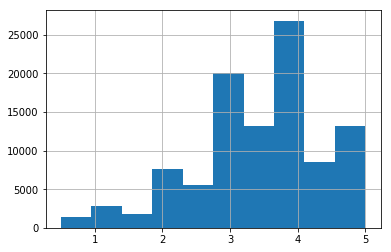

In [46]:
df.rating.hist()

In [47]:
rmse_df

,RMSE - TRAIN/TEST
BaselineOnly - ALS,0.880667
KNNBaseline - pearson_baseline - Item based,0.860315
SVD,0.881258


# Evaluation - Precision/Recall

# BaselineOnly - ALS

In [27]:
y_true = np.round(prediction_df['r_ui'])
y_pred = np.round(prediction_df['est'])

In [28]:
# notice that 0.5 becomes 0.0 after rounding - it is because minimum value of y_pred (rounded) is 1.0. There is no 0.5.
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       285
         1.0       0.00      0.00      0.00       562
         2.0       0.44      0.11      0.18      3046
         3.0       0.27      0.62      0.38      3912
         4.0       0.60      0.62      0.61      9777
         5.0       0.53      0.08      0.14      2586

   micro avg       0.45      0.45      0.45     20168
   macro avg       0.31      0.24      0.22     20168
weighted avg       0.48      0.45      0.42     20168



C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



# KNNBaseline (Peasrson): item-item

In [29]:
print(classification_report(np.round(prediction_df_2['r_ui']), np.round(prediction_df_2['est'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       285
         1.0       0.12      0.01      0.01       562
         2.0       0.44      0.12      0.18      3046
         3.0       0.28      0.57      0.38      3912
         4.0       0.61      0.66      0.63      9777
         5.0       0.57      0.17      0.27      2586

   micro avg       0.47      0.47      0.47     20168
   macro avg       0.34      0.25      0.25     20168
weighted avg       0.49      0.47      0.44     20168



C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



# SVD

In [30]:
print(classification_report(np.round(prediction_df_3['r_ui']), np.round(prediction_df_3['est'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       285
         1.0       0.11      0.00      0.01       562
         2.0       0.44      0.15      0.22      3046
         3.0       0.27      0.58      0.37      3912
         4.0       0.60      0.60      0.60      9777
         5.0       0.50      0.14      0.22      2586

   micro avg       0.45      0.45      0.45     20168
   macro avg       0.32      0.25      0.24     20168
weighted avg       0.48      0.45      0.43     20168



C:\Users\ahwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



# Conclusion
Our first thought was that SVD would give us the best result but it did not as RMSE for SVD is little bit higher than BaselineOnly's. We cannot, however, strictly say that one should always prefer ALS based BaselineOnly to SGD based SVD - depending on the case, one can still use SVD if that is more suitable for his/her own purpose. 

We then have to think about why SVD had higher RMSE. 

Our guess is that it could be something to do with feature scaling issue - how ratings are scaled. 
From the documentation of the dataset we used (http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) and from the rating historgram, we know that ratings are half-star incremented. On the other hand, alternative dataset with 1 million ratings, which we could not run SVD due to the memory issue, (http://files.grouplens.org/datasets/movielens/ml-1m-README.txt) contains whole-star ratings only. 

According to benchmark RMSE examples on http://surpriselib.com/, we see that RMSE for SVD using 100k dataset is usually around 0.934 but only 0.873 using 1m dataset.

Since SVD is based on SGD, (https://scikit-learn.org/stable/modules/sgd.html) there are several disdvantages - 1) SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations. 2) SGD is sensitive to feature scaling.

From classification report, we know that Weighted Averages for precision and recall are the highest in KNNBaseline: item to item. Hence, F1 score is also the highest in KNNBaseline: item to item. We confirm that KNNBaseline (pearson_baseline) - item to item is indeed the most accurate model. Since we have somewhat uneven class distribution, we chose to use precision/recall to measure accuracy of each model. 

If online evaluation was possible, we could experiment based on the real time trend changing dynamically i.e., if in the user's geographical location if a movie is being rated higher, then it could be recommended to the user as one of the top recommended movies. When we design an online evaluation, we should try to include quality factors such as variance, serendipity without having to compromise on accuracy. The user wouldn't be impressed with the recommended choices if we miss either. We should also prefer to include a dynamic changing stats into our recommender system such as if a user is not engaged in our system proposed choices then it should adapt to the scenario and tweak into increasing variance in the choices recommended.